In [1]:
%matplotlib inline
import numpy as np
import os
import glob
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
from matplotlib.ticker import MultipleLocator
from matplotlib import rc
import metpy.calc as mcalc
from metpy.units import units
from argparse import ArgumentParser

In [2]:
home = os.path.expanduser("~")
data_dir = os.path.join(home, "Documents", "Data", "Mesonet", "NWCmesonetF_2019")
flist = glob.glob(os.path.join(data_dir, "*.csv"))
logo_path = os.path.join(home, "Desktop", "mesonet_logo.png")
logo = plt.imread(logo_path)

In [3]:
dt0 = datetime(2019,1,1)
dt_list = []
dt_delta = timedelta(days=1)
for i in range(365):
    dt_list.append(dt0 + i*dt_delta)

In [4]:
tair_all = np.array([])
relh_all = np.array([])
wspd_all = np.array([])
dt_delta_min = timedelta(minutes=1)
dt_all = []
for i, f in enumerate(flist):
    data = np.genfromtxt(f, skip_header=3, autostrip="True", dtype=str)
    tair_all = np.concatenate((tair_all, data[:, 4].astype(float)))
    relh_all = np.concatenate((relh_all, data[:, 3].astype(float)))
    wspd_all = np.concatenate((wspd_all, data[:, 5].astype(float)))
    dt_today = []
    for j in range(1440):
        dt_today.append(dt_list[i] + j*dt_delta_min)
    dt_all += dt_today
dt_all = np.array(dt_all)
datenum_all = mpdates.date2num(dt_all)

In [5]:
tair_all[tair_all < -100.] = np.nan
relh_all[relh_all < -100.] = np.nan
wspd_all[wspd_all < -100.] = np.nan
# convert tair to F
tair_all *= units.degC
tair_all = np.array([tx.to(units.degF).magnitude for tx in tair_all])
# convert to dewpoint
tdew_all = mcalc.dewpoint_rh(tair_all*units.degF, relh_all/100.)
tdew_all = np.array([tx.to(units.degF).magnitude for tx in tdew_all])
# convert wind speed
wspd_all *= (units.meters/units.seconds)
wspd_all = np.array([wx.to(units.kts).magnitude for wx in wspd_all])

/Users/briangreene/anaconda3/lib/python3.7/site-packages/metpy/calc/thermo.py:698: RuntimeWarning: invalid value encountered in greater
  if np.any(rh > 1.2):


/Users/briangreene/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


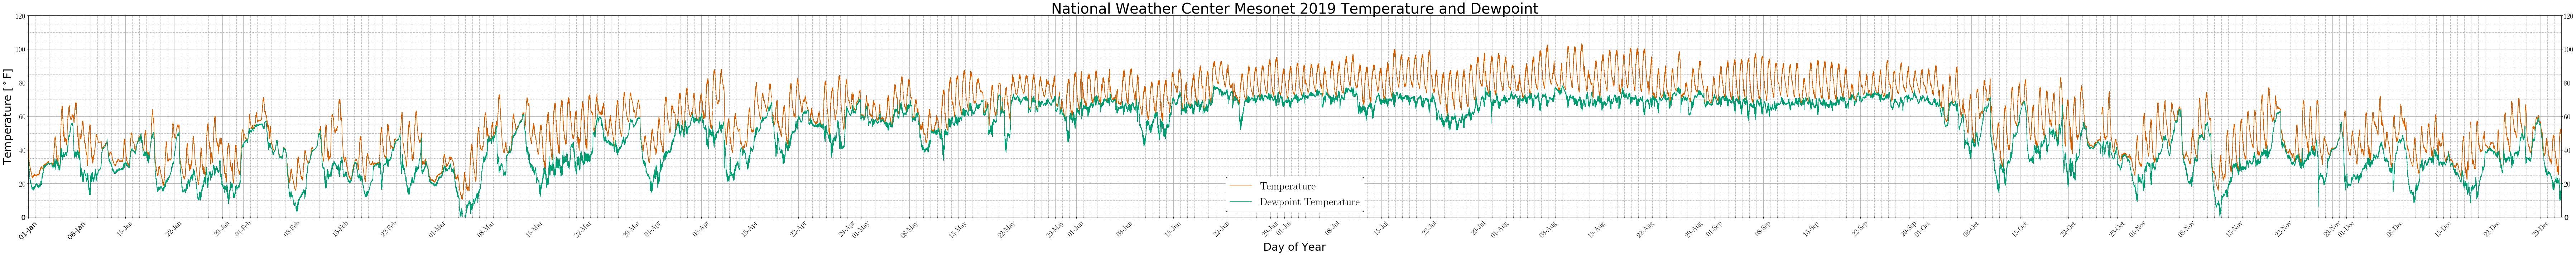

In [6]:
fig, ax = plt.subplots(1, figsize=(100, 10), facecolor=None,edgecolor=None,linewidth=2.5)
rc("font",weight="bold",family="serif",serif="Computer Modern Roman")
rc("text",usetex="True")

ln1 = ax.plot(datenum_all, tair_all, color=(213./255, 94./255, 0.))
ln2 = ax.plot(datenum_all, tdew_all, color=(0, 158./255, 115./255))
ax.set_title("National Weather Center Mesonet 2019 Temperature and Dewpoint", fontsize=40)
ax.set_xlabel("Day of Year", fontsize=30)
ax.set_ylabel("Temperature [$^\circ$F]", fontsize=30)
ax.set_xlim([datenum_all[0], datenum_all[-1]])
ax.set_ylim(0, 120)
ax.xaxis.set_major_locator(mpdates.DayLocator(bymonthday=[1, 8, 15, 22, 29]))
ax.xaxis.set_minor_locator(mpdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mpdates.DateFormatter("%d-%b"))
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(MultipleLocator(5))
ax.grid(b=True, which="major")
ax.grid(b=True, which="minor", linestyle="--")
ax.tick_params(axis="both", which="major", labelsize=20, right=True, labelright=True)

# ax2=ax.twinx()
# ln3 = ax2.plot(datenum_all[0::30], wspd_all[0::30], color=(0., 114./255, 178./255), linestyle="", marker=".")
# ax2.set_ylabel("Wind Speed [kts]", fontsize=30)
# ax2.set_ylim(0, 30)
# ax2.yaxis.set_major_locator(MultipleLocator(5))
# ax2.tick_params(axis="y", which="major", labelsize=20)

lns=ln1+ln2
labels = ("Temperature", "Dewpoint Temperature")
ax.legend(lns, labels, loc="lower center", fontsize=30, fancybox=True, framealpha=1, edgecolor="black")

# add logo
fig.figimage(logo, 200, 1200, zorder=100)

plt.tight_layout()

In [7]:
fig_name = os.path.join(data_dir, "NWC_Meteogram_2019_Temperature.pdf")
fig.savefig(fig_name, format="pdf", dpi=150)

In [8]:
fig_name_png = os.path.join(data_dir, "NWC_Meteogram_2019_Temperature.png")
fig.savefig(fig_name_png, format="png", dpi=150)